In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
path = "../input/chest_xray/chest_xray/"
print(path)

print(os.listdir(path))

# Any results you write to the current directory are saved as output.

['chest_xray']
../input/chest_xray/chest_xray/
['val', 'train', 'test', '.DS_Store']


In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

In [4]:
doc(ImageDataBunch.from_folder)

In [5]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, 
                                  size=224, num_workers=0, 
                                  bs=bs, valid='val').normalize(imagenet_stats)

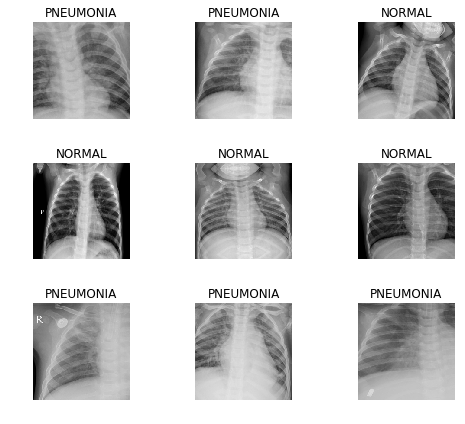

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 76355197.05it/s]


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.323068,0.669782,0.250000
2,0.204069,0.312041,0.125000
3,0.147285,0.397848,0.312500
4,0.129624,0.285038,0.187500


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

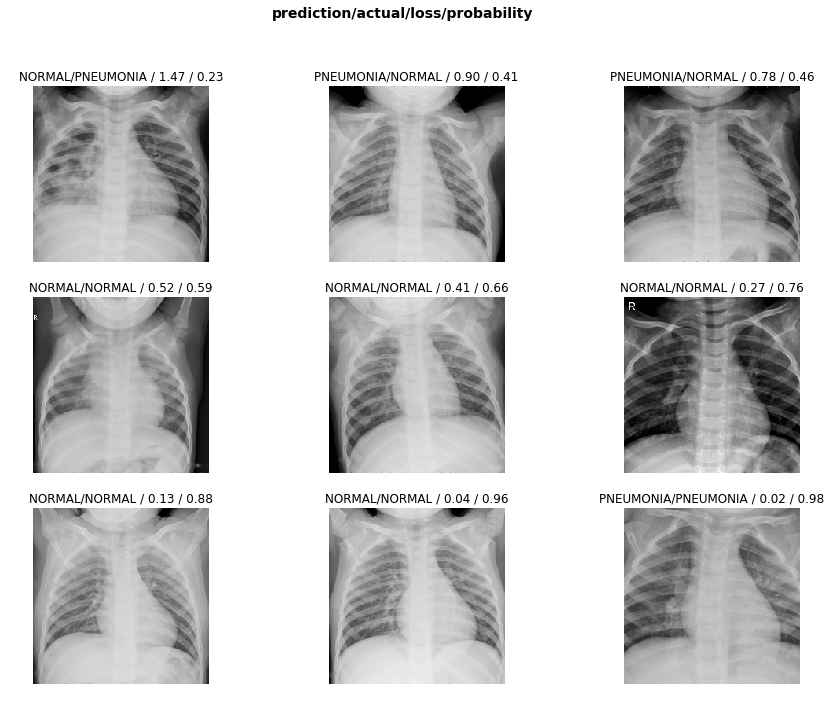

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

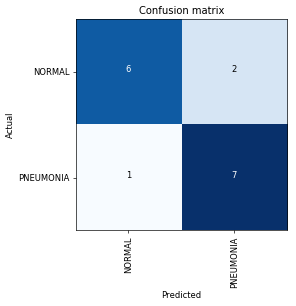

In [12]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [13]:
interp.most_confused(min_val=2)

[]

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.120151,0.336043,0.187500


In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


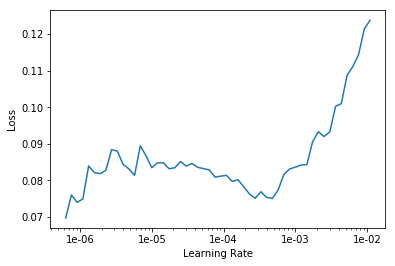

In [17]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate
